In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Exercícios

Utilizando a plotagem com pandas, reproduzam as visualizações abaixo, tentando deixá-las o mais próximas quanto possível da maneira como estão postas. Para isso, atentem-se às personalizações dos gráficos, como títulos, legendas, eixos e outros tipos possíveis de formatações e preferências de visualizações dos dados. Também é interessante que vocês discutam possíveis pontos de melhorias dessas visualizações!

**Exercício 1.** Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [2]:
df = pd.read_csv("data\Covid_19_Countrywise_timeseries.csv")
df['month'] = pd.to_datetime(df["ObservationDate"]).dt.month

In [3]:
df_top_10 = df.groupby("country")["New Confirmed"].sum().sort_values(ascending=False)[0:10]

In [4]:
# Definindo top 10 geral, não apenas de um mês
df_top_10 = pd.DataFrame(df_top_10)

In [5]:
df_top_10[['2020-01', '2020-02', '2020-03']] = 0
df_top_10

,New Confirmed,2020-01,2020-02,2020-03
country,,,,
us,121478,0,0,0
italy,92472,0,0,0
china,81401,0,0,0
spain,73235,0,0,0
germany,57695,0,0,0
france,38105,0,0,0
iran,35408,0,0,0
uk,17312,0,0,0
switzerland,14076,0,0,0


In [6]:
for i in range(len(df)):
    country = df.iloc[i]['country']
    if country in df_top_10.index:
        if df.iloc[i]['month'] == 1:
            df_top_10.at[country, '2020-01'] += df.iloc[i]['New Confirmed']
        elif df.iloc[i]['month'] == 2:
            df_top_10.at[country, '2020-02'] += df.iloc[i]['New Confirmed']
        elif df.iloc[i]['month'] == 3:
            df_top_10.at[country, '2020-03'] += df.iloc[i]['New Confirmed']

In [7]:
df_top_10.drop(columns=['New Confirmed'], inplace=True)

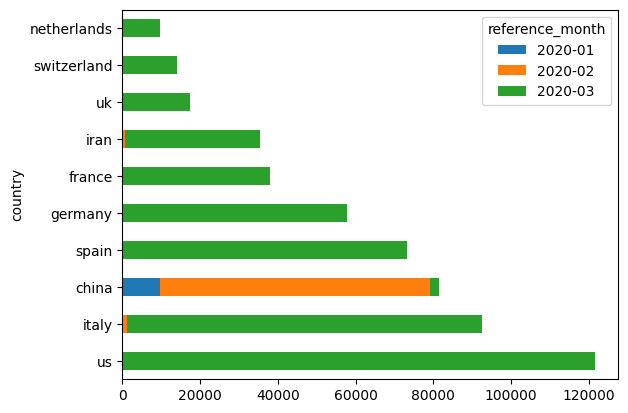

In [8]:
df_top_10.plot(kind='barh', stacked=True)
plt.legend(title='reference_month')

Para os exercícios abaixo, vamos trabalhar com um dataset de [emissão de CO2 por país, ao longo do tempo](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country).

**Exercício 2.** Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

In [9]:
df_co2 = pd.read_csv("data/co2_emissions_kt_by_country.csv")
df_co2.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [10]:
df_brasil = df_co2.loc[df_co2['country_name']=='Brazil', ['year', 'value']].reset_index(drop=True)
df_brasil.head()

,year,value
0,1960,46908.264
1,1961,49203.806
2,1962,53695.881
3,1963,55617.389
4,1964,56735.824


<AxesSubplot: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

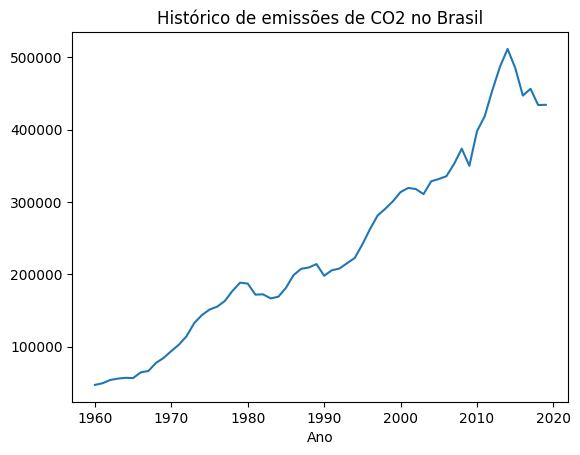

In [11]:
df_brasil.plot(kind='line', 
               x='year', 
               y='value',
               title='Histórico de emissões de CO2 no Brasil',
               xlabel='Ano',
               legend=False)

**Exercício 3**. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

<AxesSubplot: xlabel='year'>

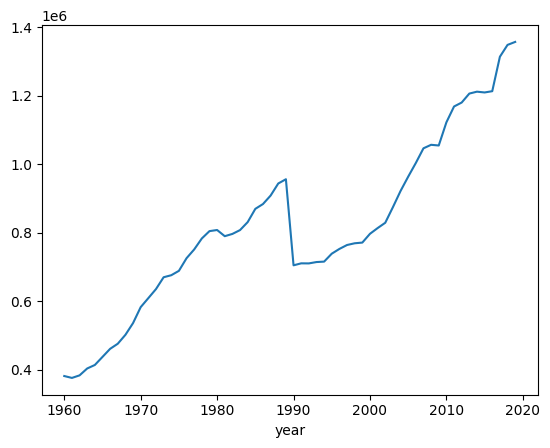

In [12]:
# Excluindo Brasil da média global

df_co2.loc[df_co2['country_name']!='Brazil', ['year', 'value']].groupby(['year'])['value'].mean().plot(kind='line')

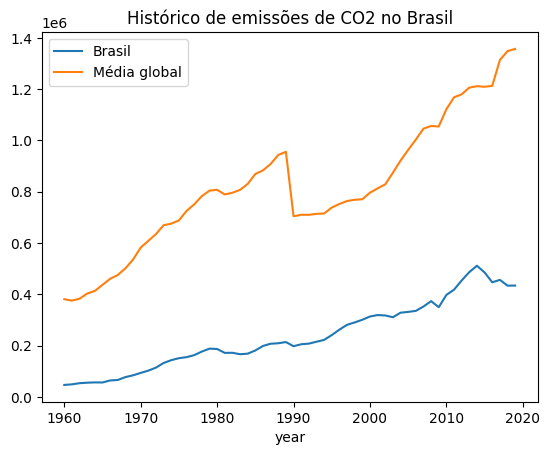

In [13]:
df_brasil.plot(kind='line', 
               x='year', 
               y='value',
               title='Histórico de emissões de CO2 no Brasil',
               xlabel='Ano', legend='Brasil')

df_co2.loc[
            df_co2['country_name']!='Brazil', ['year', 
                                              'value']].groupby(['year'])['value'].mean().plot(kind='line')
plt.legend(['Brasil', 'Média global'])
plt.draw()

**Exercício 4.** Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

In [14]:
df_ano = df_co2.loc[(df_co2['year'] == 2018), ['country_name', 'value']].groupby('country_name').sum()
df_ano['2019'] = df_co2.loc[(df_co2['year'] == 2019), ['country_name', 'value']].groupby('country_name').sum()
df_ano.rename(columns = {'value':'2018'}, inplace = True)
df_ano



,2018,2019
country_name,,
Afghanistan,6.070000e+03,6.080000e+03
Africa Eastern and Southern,5.900400e+05,6.030300e+05
Africa Western and Central,2.117200e+05,2.207400e+05
Albania,5.110000e+03,4.830000e+03
Algeria,1.655400e+05,1.712500e+05
...,...,...
Vietnam,2.856000e+05,3.364900e+05
World,3.428935e+07,3.434401e+07
"Yemen, Rep.",9.720000e+03,1.110000e+04


In [33]:
top_10 = df_ano.pct_change(axis='columns', periods=1).dropna(axis='columns').sort_values(by='2019', ascending=True)[-10:]
top_10['2019'] *= 100

,2019
country_name,
Myanmar,11.475418
"Congo, Rep.",11.864414
North Macedonia,13.698630
"Yemen, Rep.",14.197532
El Salvador,14.537449
Vietnam,17.818622
Suriname,19.909505
Madagascar,22.985075
Kenya,27.387084


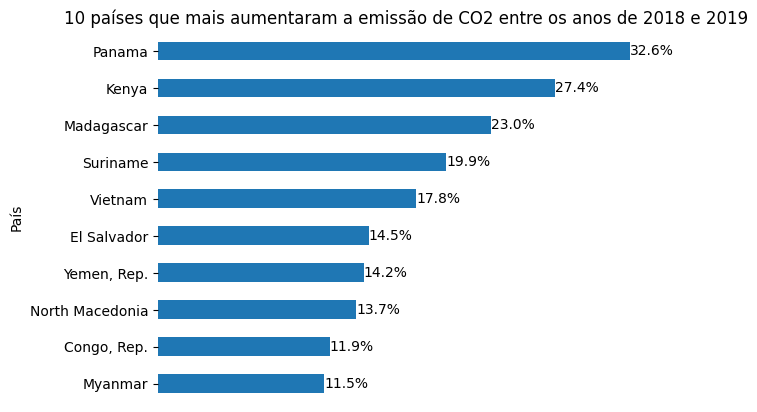

In [39]:
ax = top_10.plot(kind='barh',
            title='10 países que mais aumentaram a emissão de CO2 entre os anos de 2018 e 2019',
            legend=False,
            xlabel='Aumento percentual',
            ylabel='País')

ax.bar_label(ax.containers[0], fmt='%.1f%%')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_xaxis().set_visible(False)

plt.draw()
